### Lab: Clustering with Sklearn

In [60]:
%matplotlib inline
from collections import Counter
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics

plt.rcParams['figure.figsize'] = (8, 6)

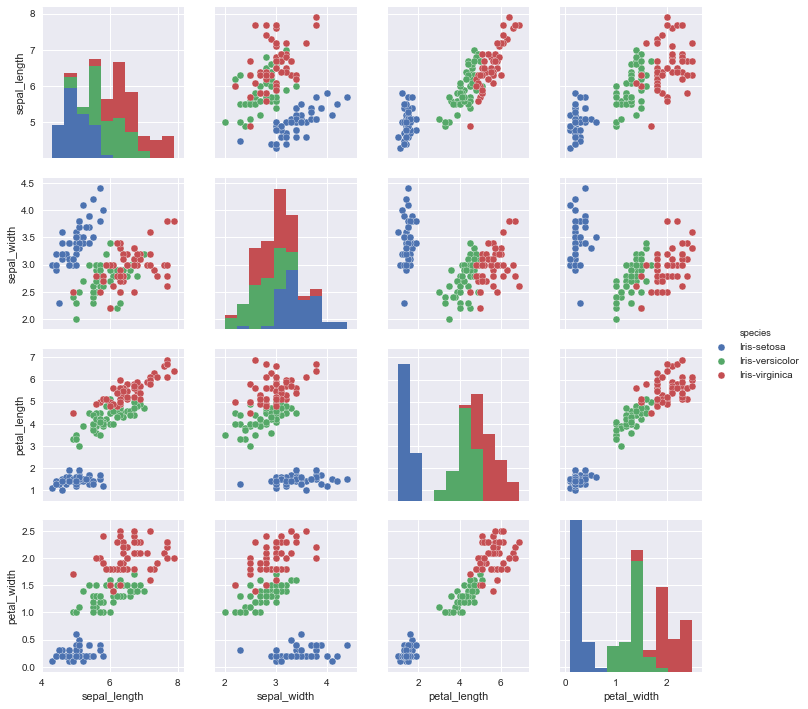

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [61]:
iris = pd.read_csv("data/iris.data")
sns.pairplot(iris, hue="species")
plt.show()
iris.tail()

### 1. K-Means

For the Iris dataset, fit and plot k-means models to:
* sepal_length and petal_length, for k=3
* sepal_width and petal_width, for k=3

After: Check out the 3D-example [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

In [62]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

Counter({0: 53, 1: 49, 2: 48})


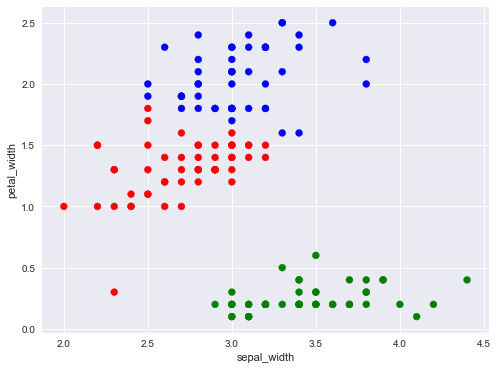

In [63]:
from sklearn import metrics

# Fit a k-means estimator
estimator = KMeans(n_clusters=3)
X = iris[["sepal_width", "petal_width"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(iris["sepal_width"], iris["petal_width"], c=colors)
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.show()

Counter({2: 58, 1: 51, 0: 41})


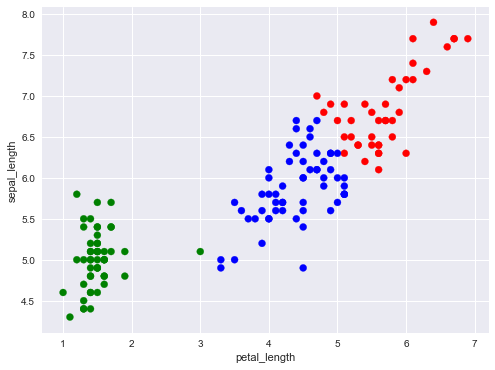

In [64]:
from sklearn import metrics

# Fit a k-means estimator
estimator = KMeans(n_clusters=3)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()

### 2. DBSCAN

For the Iris dataset, fit and plot DBSCAN models to:
* sepal_length and petal_length
* sepal_width and petal_width

Counter({1: 91, 0: 50, -1: 9})


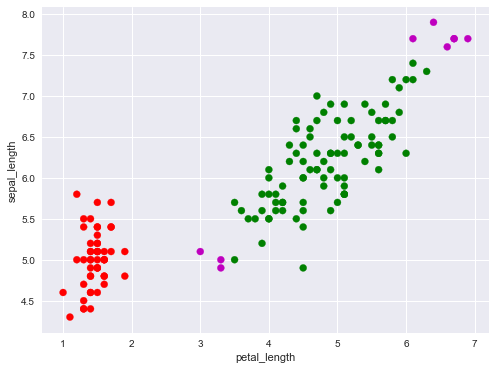

In [65]:
## Exercise Answers here

# Fit a DBSCAN
estimator = DBSCAN(eps=0.5, min_samples=10)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()

Counter({1: 82, 0: 44, -1: 24})


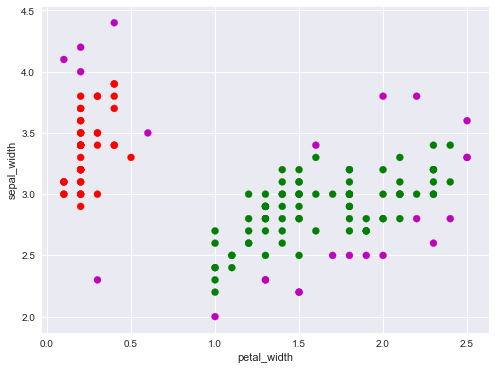

In [66]:
## Exercise Answers here

# Fit a DBSCAN
estimator = DBSCAN(eps=0.2, min_samples=5)
X = iris[["sepal_width", "petal_width"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(iris["petal_width"], iris["sepal_width"], c=colors)
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

### 3. Hierarchical Clustering

For the Iris dataset, fit and plot AgglomerativeClustering models to:
* sepal_length and petal_length
* sepal_width and petal_width

Counter({0: 74, 1: 50, 2: 26})


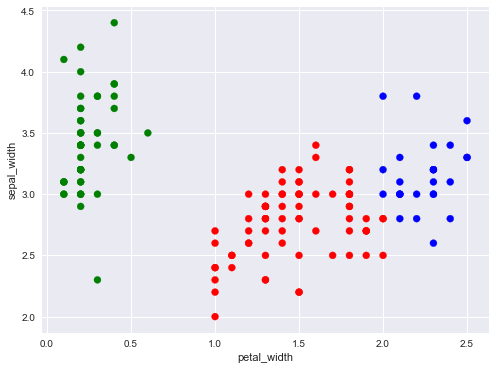

In [67]:
# Hierarchical: Agglomerative Clustering
# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=3)
X = iris[["sepal_width", "petal_width"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(iris["petal_width"], iris["sepal_width"], c=colors)
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

### 4. Calculate the Silhouette Coefficients for the three estimators when using sepal_width and petal_width

In [75]:
## Silhouette Coefficient
estimator1 = KMeans(n_clusters=3)
X = iris[["sepal_width", "petal_width"]]
estimator1.fit(X)
# Clusters are given in the labels_ attribute
labels1 = estimator1.labels_
print Counter(labels1)
print metrics.silhouette_score(X, labels1, metric='euclidean')

Counter({1: 53, 2: 49, 0: 48})
0.527862995293


In [76]:
estimator2 = DBSCAN(eps=0.5, min_samples=10)
X = iris[["sepal_width", "petal_width"]]
estimator2.fit(X)
# Clusters are given in the labels_ attribute
labels2 = estimator2.labels_
print Counter(labels2)
print metrics.silhouette_score(X, labels2, metric='euclidean')

Counter({1: 100, 0: 49, -1: 1})
0.530259534502


In [77]:
estimator3 = AgglomerativeClustering(n_clusters=3)
X = iris[["sepal_width", "petal_width"]]
estimator3.fit(X)
# Clusters are given in the labels_ attribute
labels3 = estimator3.labels_
print Counter(labels3)
print metrics.silhouette_score(X, labels3, metric='euclidean')

Counter({0: 74, 1: 50, 2: 26})
0.519730330713


#### Using all four variables

In [71]:
## Silhouette Coefficient
estimator1 = KMeans(n_clusters=3)
X = iris[["sepal_width", "petal_width", "sepal_length", "petal_length"]]
estimator1.fit(X)
# Clusters are given in the labels_ attribute
labels1 = estimator1.labels_
print Counter(labels1)
print metrics.silhouette_score(X, labels1, metric='euclidean')

Counter({1: 62, 0: 50, 2: 38})
0.552591944521


### Bonus: Calculate the adjusted rand score for the three estimators 

In [78]:
metrics.adjusted_rand_score(labels1, iris["species"])

0.79717470561917547

In [79]:
metrics.adjusted_rand_score(labels2, iris["species"])

0.55837144375413517

In [80]:
metrics.adjusted_rand_score(labels3, iris["species"])

0.64444723539200599

### Bonus: Try clustering different beers

In [84]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
X = StandardScaler().fit_transform(beer[["calories", "sodium", "alcohol", "cost"]])

In [88]:
est = KMeans(3)

In [89]:
est.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [90]:
beer["label"] = est.labels_

In [92]:
colors = set_colors(beer["label"])

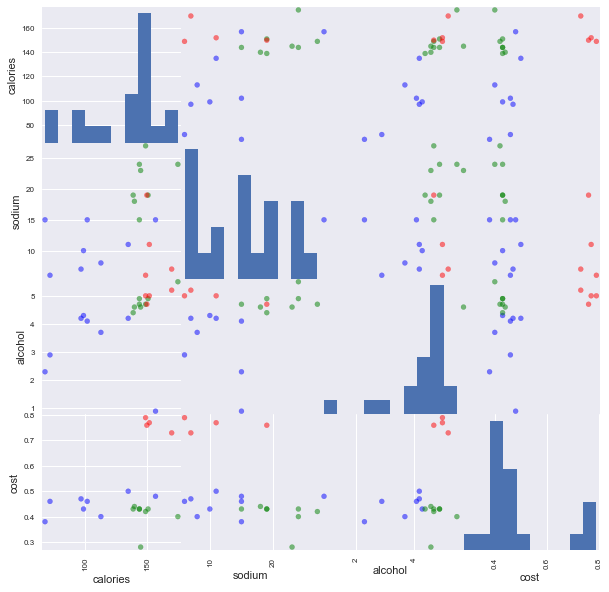

In [93]:
pd.scatter_matrix(beer[["calories", "sodium", "alcohol", "cost"]], c=colors, figsize=(10,10), s=100)
plt.show()